<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/other/convolution_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image convolution demo

In [37]:
#from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
from google.colab import drive

import zipfile
import os


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/cv_common.ipynb'

Common library was successfully loaded


In [25]:
path = '/content/drive/MyDrive/Workspace/Computer Vision/datasets/sample_images/family_1.jpg'
image = CVImage.read_gray(path)
image_np = image.to_nparray()


In [26]:
#image_np = np.array(image, 'uint8')
image_np.shape

(1600, 1197)

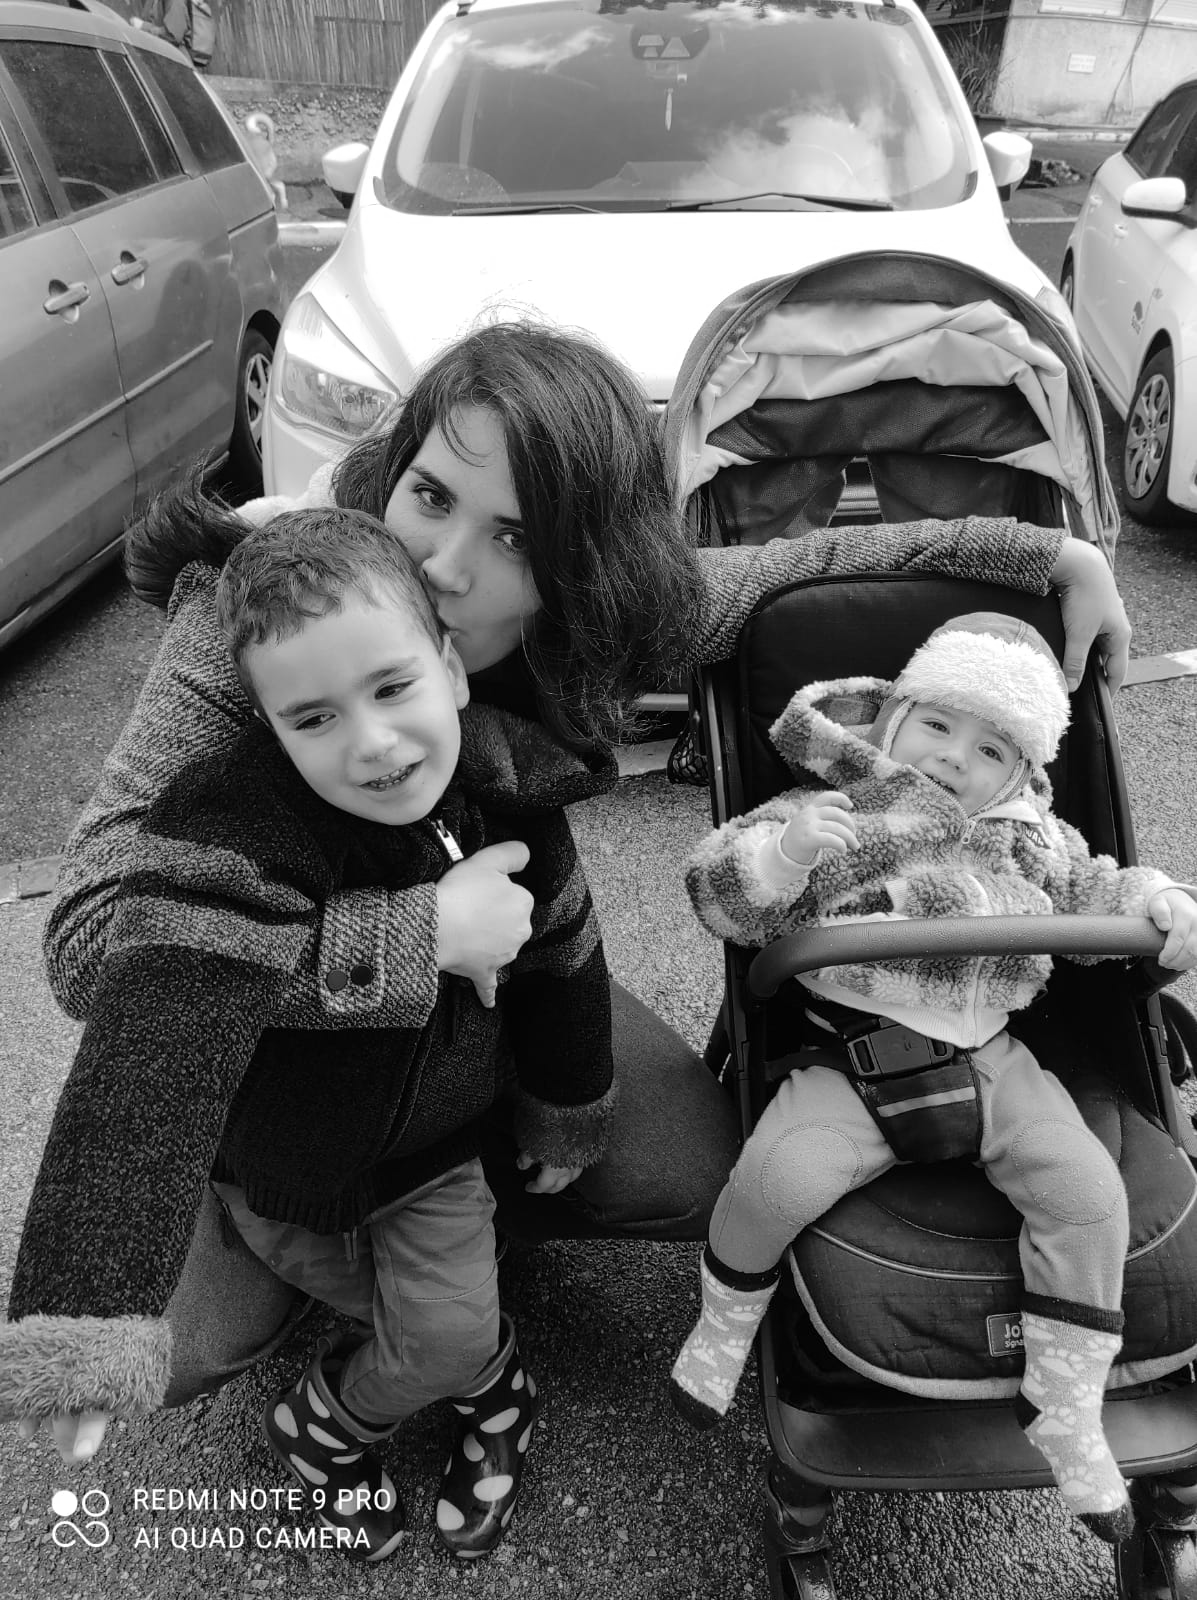

In [27]:
cv2_imshow(image_np)

In [35]:
newsize = (int(image_np.shape[1] / 2), int(image_np.shape[0] / 2))
image_np = cv2.resize(image_np, newsize, interpolation = cv2.INTER_AREA)
image_np.shape

(800, 598)

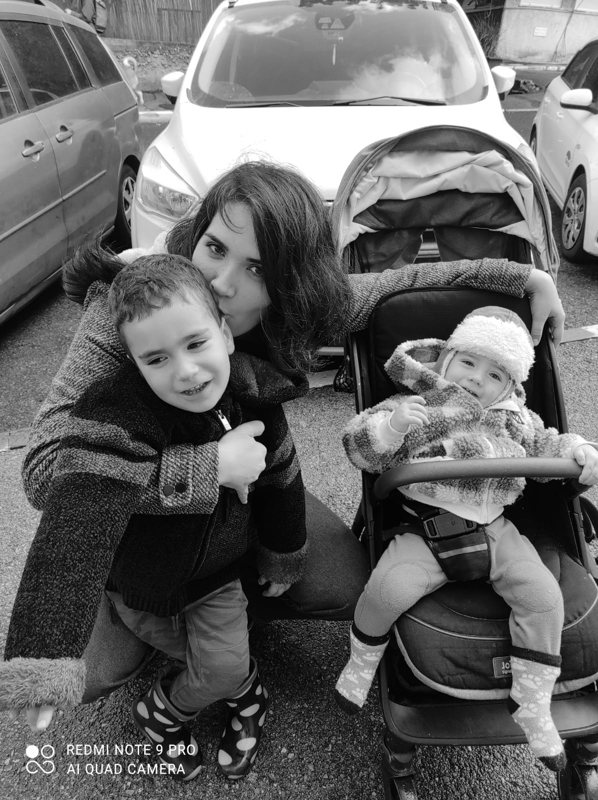

In [6]:
cv2_imshow(image_np)

## Custom convolution method

In [7]:
image_width = image_np.shape[0]
image_height = image_np.shape[1]

kernel = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
kernel = np.asarray(kernel)
kernel_width = kernel.shape[0]
kernel_height = kernel.shape[1]

conv_image_width = image_width - kernel_width
conv_image_height = image_height - kernel_height

conv_image = []
for i in range(conv_image_width):
  conv_image.append([])
  for j in range(conv_image_height):
    conv_image[i].append(0)

conv_image = np.asarray(conv_image)

In [8]:
for i in range(image_width):
  for j in range(image_height):
    if (i + kernel_width < image_width) and (j + kernel_height < image_height):
      value = 0
      for p in range(kernel_width):
        for q in range(kernel_height):
          value = value + image_np[i + p, j + q]*kernel[p, q]
      conv_image[i, j] = value

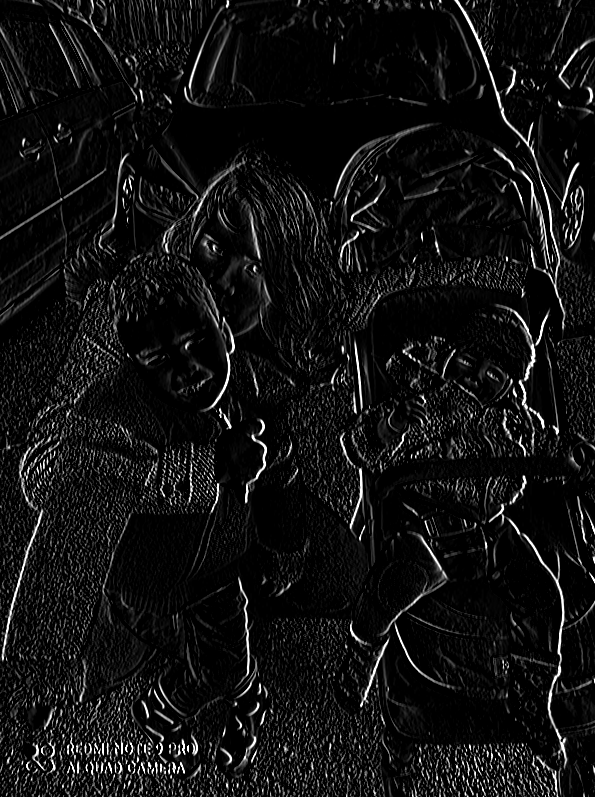

In [9]:
cv2_imshow(conv_image)

## Applying different kernels with cv2

In [53]:
kernels = []
kernels.append([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernels.append([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernels.append([[1, 1, 1], [1, 1, 0], [1, 0, 0]])
kernels.append([[1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [-1, -1, -1, -1, -1]])


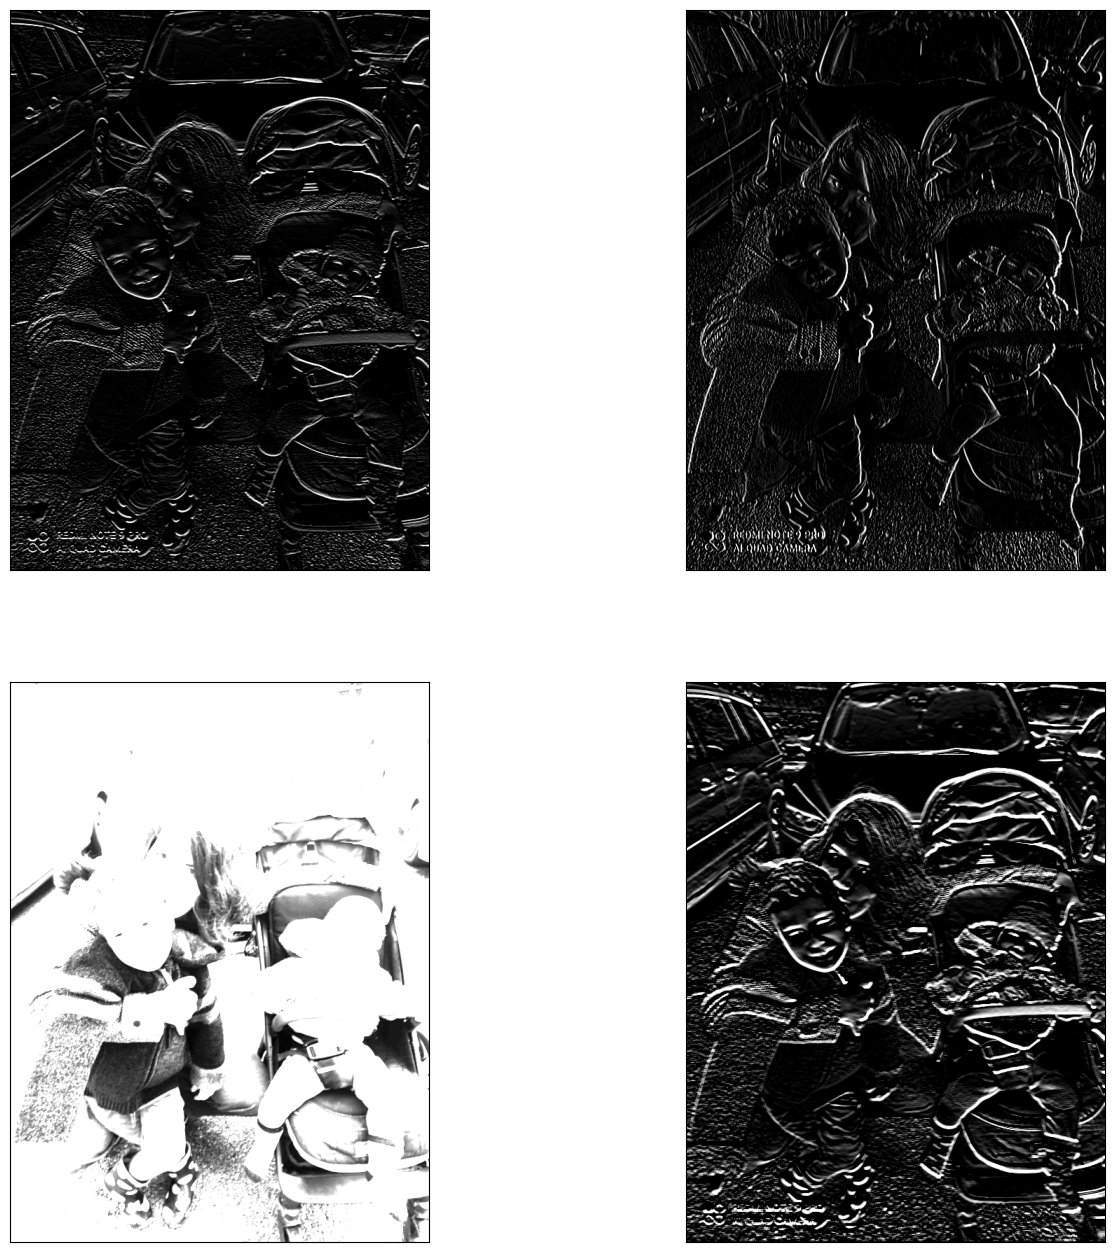

In [54]:
filtered_images = []
for kernel in kernels:
  filtered_image = cv2.filter2D(src=image_np, ddepth=-1, kernel=np.asarray(kernel))
  filtered_images.append(filtered_image)

w = 10
h = 10
fig = plt.figure(figsize=(16, 16))
columns = 2
rows = 2
image_index = 0
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    ax = fig.add_subplot(rows, columns, i)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(filtered_images[image_index], cmap='gray')
    image_index += 1
plt.show()

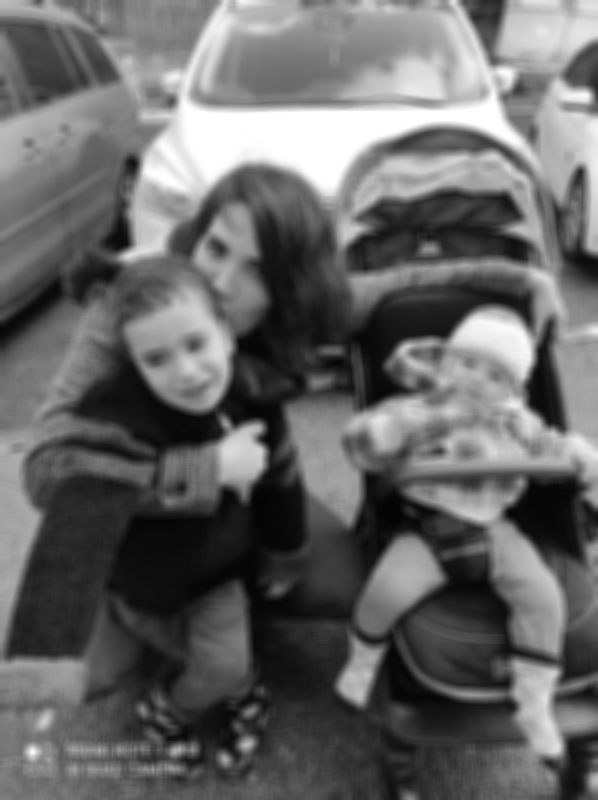

In [58]:
blured_image = cv2.blur(image_np, ksize=(10, 10))
cv2_imshow(blured_image)

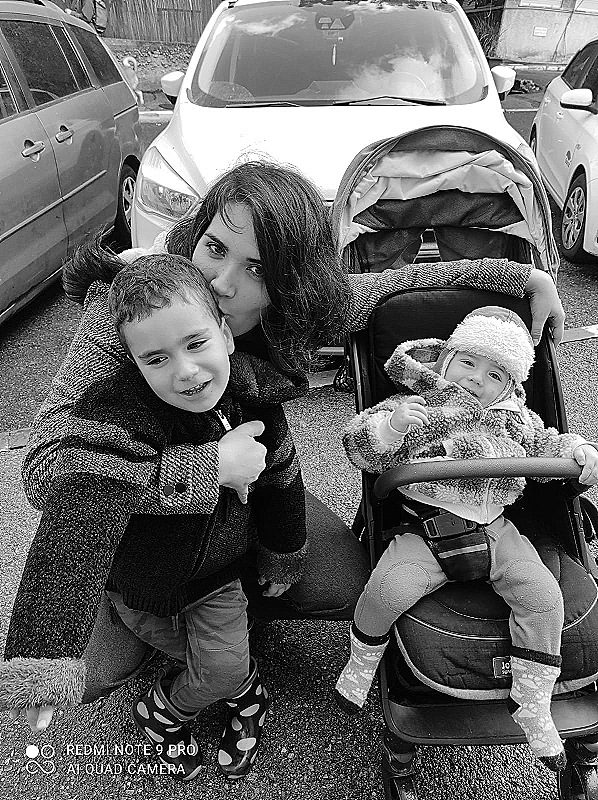

In [61]:
sharpening_kernel = np.array([[0, -1,  0],
                   [-1,  5, -1],
                    [0, -1,  0]])
sharp_image = cv2.filter2D(src=image_np, ddepth=-1, kernel=sharpening_kernel)
cv2_imshow(sharp_image)